In [4]:
from sklearn import linear_model, preprocessing, metrics
from sklearn.model_selection import train_test_split
from statsmodels.tools import eval_measures
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow as tf
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
# Importing training csv files
feature_df = pd.read_csv("dengue_features_train.csv", index_col=[0,1,2])
label_df = pd.read_csv("dengue_labels_train.csv", index_col=[0,1,2])

In [6]:
# Seperate data for San Juan
sj_train_features = feature_df.loc['sj']
sj_train_labels = label_df.loc['sj']

# Separate data for Iquitos
iq_train_features = feature_df.loc['iq']
iq_train_labels = label_df.loc['iq']

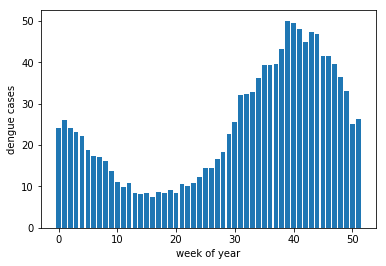

In [7]:
# Bar chart showing week of year to number of dengue cases relationship, for observation.
label_df['mean_cases'] = label_df.groupby('weekofyear').total_cases.transform(np.mean)
mean_list = []
for index, case in enumerate(label_df['mean_cases'][35:87], 1):
    mean_list.append(case)

plt.bar(range(len(mean_list)), mean_list, align='center')
plt.xlabel('week of year')
plt.ylabel('dengue cases')

plt.show()

In [8]:
# Remove 'week_start_date' string due to format inconsistency.
sj_train_features.drop('week_start_date', axis=1, inplace=True)
iq_train_features.drop('week_start_date', axis=1, inplace=True)

In [9]:
sj_train_features['total_cases'] = sj_train_labels.total_cases
iq_train_features['total_cases'] = iq_train_labels.total_cases

In [10]:
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

In [11]:
# compute the correlations
sj_correlations = sj_train_features.corr()
iq_correlations = iq_train_features.corr()

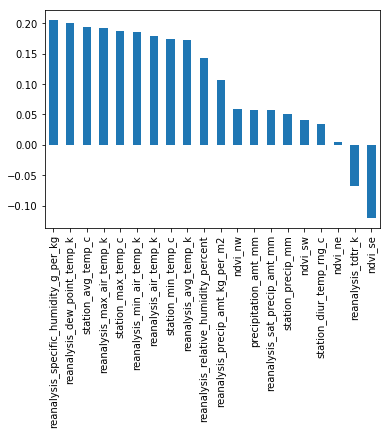

In [12]:
# San Juan
(sj_correlations.total_cases.drop('total_cases').sort_values(ascending=False).plot.bar())
plt.show()

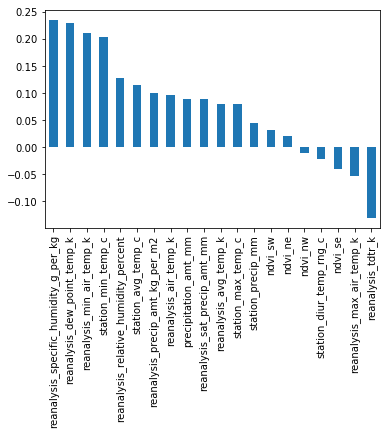

In [13]:
# Iquitos
(iq_correlations.total_cases.drop('total_cases').sort_values(ascending=False).plot.bar())
plt.show()

In [14]:
features = ['reanalysis_specific_humidity_g_per_kg', 
            'reanalysis_dew_point_temp_k', 
            'station_avg_temp_c', 
            'station_min_temp_c',
            'station_max_temp_c',
            'reanalysis_min_air_temp_k',
            'reanalysis_air_temp_k',
            'reanalysis_avg_temp_k',
            'reanalysis_precip_amt_kg_per_m2',
            'reanalysis_relative_humidity_percent',
            "reanalysis_max_air_temp_k"
            ]

In [15]:
# label dataframes for train
sj_train_label = sj_train_features.total_cases
iq_train_label = iq_train_features.total_cases

In [16]:
# feature dataframes for train
sj_train_features = sj_train_features[features]
iq_train_features = iq_train_features[features]

In [17]:
# print('sj_train_label.shape: {}'.format(sj_train_label.shape))
# print('iq_train_label.shape: {}'.format(iq_train_label.shape))
# print
# print('sj_train_features.shape: {}'.format(sj_train_features.shape))
# print('iq_train_features.shape: {}'.format(iq_train_features.shape))

In [18]:
# Simple moving average for SJ
counts = sj_train_label
counts_copy = sj_train_label
start=35
end=399
counts = counts[start:end]
print len(counts)/52, " years for training"


def simple_moving_average(counts, window_size):
    weights = np.repeat(1.0, window_size)/window_size
    sma = np.convolve(counts, weights, 'valid')
    return sma

sma_result = simple_moving_average(counts,3)

increment = len(sma_result)
for index, item in enumerate(list(sma_result)):
    sma_result[index] = item//1
sma_result= list(sma_result)

to_test = list(counts_copy[end:end+increment])
print len(sma_result)
print len(to_test)

if len(sma_result) == len(to_test):
    mae = metrics.mean_absolute_error(to_test, sma_result)
    print mae

7  years for training
362
362
31.9419889503


In [19]:
counts = iq_train_label

print len(counts[26:235])#209

print len (counts[235:len(counts)-76])



209
209


In [20]:
counts = iq_train_label
counts_copy = iq_train_label
start=26
end=235
counts = counts[start:end]
print len(counts)/52, " years for training"


def simple_moving_average(counts, window_size):
    weights = np.repeat(1.0, window_size)/window_size
    sma = np.convolve(counts, weights, 'valid')
    return sma

sma_result = simple_moving_average(counts,3)

increment = len(sma_result)
for index, item in enumerate(list(sma_result)):
    sma_result[index] = item//1
sma_result= list(sma_result)

to_test = list(counts_copy[end:end+increment])
print len(sma_result)
print len(to_test)

if len(sma_result) == len(to_test):
    mae = metrics.mean_absolute_error(to_test, sma_result)
    print mae

4  years for training
207
207
9.40096618357


In [21]:
# Linear Regression for sj

x_df = sj_train_features
y_df = sj_train_label

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=4)

reg = linear_model.LinearRegression(normalize=True)

reg.fit(x_train, y_train)

print('Linear regression for sj')
print("Score: ", reg.score(x_test, y_test))

predictions = reg.predict(x_test)

print("Mean absolute error:", eval_measures.meanabs(predictions, y_test))


Linear regression for sj
('Score: ', 0.076124092946323274)
('Mean absolute error:', 29.208894892411926)


In [22]:
# Linear Regression for iq

x_df = iq_train_features
y_df = iq_train_label

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=4)

reg = linear_model.LinearRegression(normalize=True)

reg.fit(x_train, y_train)

print('Linear regression for iq')
print("Score: ", reg.score(x_test, y_test))

predictions = reg.predict(x_test)

print("Mean absolute error:", eval_measures.meanabs(predictions, y_test))

Linear regression for iq
('Score: ', 0.11202305842423799)
('Mean absolute error:', 5.67514519747718)


In [23]:
# Ridge regression for sj

x_df = sj_train_features
y_df = sj_train_label

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=4)

reg = linear_model.RidgeCV(alphas=[1, 0.1, 0.01, 0.001, 0.0001, 0.00001], normalize=True).fit(x_train,y_train)

reg.fit(x_train, y_train)

print('Ridge regression for sj')
print("Score: ", reg.score(x_test, y_test))

predictions = reg.predict(x_test)

print("Mean absolute error:", eval_measures.meanabs(predictions, y_test))

Ridge regression for sj
('Score: ', 0.059430379404914357)
('Mean absolute error:', 29.814232400305851)


In [24]:
# Ridge regression for iq

x_df = iq_train_features
y_df = iq_train_label

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=4)

reg = linear_model.RidgeCV(alphas=[1, 0.1, 0.01, 0.001, 0.0001, 0.00001], normalize=False).fit(x_train,y_train)

reg.fit(x_train, y_train)

print('Ridge regression for iq')
print("Score: ", reg.score(x_test, y_test))

predictions = reg.predict(x_test)

print("Mean absolute error:", eval_measures.meanabs(predictions, y_test))

Ridge regression for iq
('Score: ', 0.1051362090643122)
('Mean absolute error:', 5.7189704834083273)


In [25]:
# Lasso regression for sj

x_df = sj_train_features
y_df = sj_train_label

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=4)

reg = linear_model.LassoCV(alphas=[1, 0.1, 0.01, 0.001, 0.0001, 0.00001], normalize=True).fit(x_train,y_train)

reg.fit(x_train, y_train)

print('Lasso regression for sj')
print("Score: ", reg.score(x_test, y_test))

predictions = reg.predict(x_test)

print("Mean absolute error:", eval_measures.meanabs(predictions, y_test))

Lasso regression for sj
('Score: ', 0.081217305935547546)
('Mean absolute error:', 28.981790904080643)


In [26]:
# Lasso regression for iq

x_df = iq_train_features
y_df = iq_train_label

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=4)

reg = linear_model.LassoCV(alphas=[1, 0.1, 0.01, 0.001, 0.0001, 0.00001], normalize=False).fit(x_train,y_train)

reg.fit(x_train, y_train)

print('Lasso regression for iq')
print("Score: ", reg.score(x_test, y_test))

predictions = reg.predict(x_test)

print("Mean absolute error:", eval_measures.meanabs(predictions, y_test))

Lasso regression for iq
('Score: ', 0.072732861829565176)
('Mean absolute error:', 5.8753815780104279)


In [27]:
# Elastic Net regression for sj

x_df = sj_train_features
y_df = sj_train_label

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=4)

reg = linear_model.ElasticNetCV(alphas=[1, 0.1, 0.01, 0.001, 0.0001, 0.00001], normalize=False).fit(x_train,y_train)

reg.fit(x_train, y_train)

print('Elastic Net regression for sj')
print("Score: ", reg.score(x_test, y_test))

predictions = reg.predict(x_test)

print("Mean absolute error:", eval_measures.meanabs(predictions, y_test))

Elastic Net regression for sj
('Score: ', 0.08138729990195781)
('Mean absolute error:', 28.975987160111046)


In [28]:
# Elastic Net regression for iq

x_df = iq_train_features
y_df = iq_train_label

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=4)

reg = linear_model.ElasticNetCV(alphas=[1, 0.1, 0.01, 0.001, 0.0001, 0.00001], normalize=False).fit(x_train,y_train)

reg.fit(x_train, y_train)

print('Elastic Net regression for iq')
print("Score: ", reg.score(x_test, y_test))

predictions = reg.predict(x_test)

print("Mean absolute error:", eval_measures.meanabs(predictions, y_test))

Elastic Net regression for iq
('Score: ', 0.076891816992505357)
('Mean absolute error:', 5.8910165167581887)


In [29]:
sj_train_frame = [sj_train_features, sj_train_label]
sj_train_merged = pd.concat(sj_train_frame, axis=1)

iq_train_frame = [iq_train_features, iq_train_label]
iq_train_merged = pd.concat(iq_train_frame, axis=1)

In [30]:
# PCA(Principal Component Analysis) for SJ

X = sj_train_merged.ix[:,0:11].values
y = sj_train_merged.ix[:,11].values

X_std = preprocessing.StandardScaler().fit_transform(X)

# eigendecomposition on the covariance matrix

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

print("\n-------------\n")

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
count=0
print('Eigenvalues in descending order for SJ:')
for i in eig_pairs:
    print(count,i[0], list(sj_train_features)[count])
    count+=1

Eigenvectors 
[[ 0.34194954 -0.13677797  0.11403909 -0.15619749 -0.16541103 -0.04061804
   0.14184004  0.17190776  0.53456695 -0.6783522   0.0485251 ]
 [ 0.34170679 -0.13701342  0.11426573 -0.17954296 -0.15912287 -0.0095229
   0.11606676  0.19880939  0.0621406   0.47458812  0.71531021]
 [ 0.33243914  0.08124671 -0.3074934   0.02367154  0.28940117  0.09031933
   0.66440212 -0.50371902 -0.02357902  0.01107327  0.00429279]
 [ 0.31774526  0.00113665 -0.02388334 -0.1038411   0.79396839 -0.3443713
  -0.31630634  0.19646195  0.00369569 -0.00665292 -0.00096998]
 [ 0.2780509   0.10812107 -0.78829335  0.19388432 -0.17278918  0.2653655
  -0.27727538  0.27277606  0.02007076 -0.00568138 -0.0012287 ]
 [ 0.32701539  0.08930401  0.33380506 -0.0618207   0.07701108  0.65189784
  -0.43301513 -0.38799034  0.02913354 -0.00668348 -0.00214031]
 [ 0.33601777  0.17371041  0.23921423  0.10303402 -0.09975668  0.02227428
   0.20392369  0.31718707  0.25351701  0.45332439 -0.60552736]
 [ 0.33472406  0.18892107  0.2

In [31]:
# PCA(Principal Component Analysis) for IQ

X = iq_train_merged.ix[:,0:11].values
y = iq_train_merged.ix[:,11].values

X_std = preprocessing.StandardScaler().fit_transform(X)

# eigendecomposition on the covariance matrix

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

print("\n-------------\n")

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order for IQ:')
count=0
for i in eig_pairs:
    print(count,i[0], list(iq_train_features)[count])
    count+=1

Eigenvectors 
[[ -4.13958851e-01  -2.16739502e-01   7.49899447e-02  -5.22688194e-02
    2.44759736e-01  -2.73193148e-01   1.12622118e-01  -1.28681372e-01
   -1.65387594e-01   4.46778601e-01  -6.18512652e-01]
 [ -4.08745459e-01  -2.27300229e-01   5.93027512e-02  -5.49944427e-02
    2.52932999e-01  -2.84495158e-01   9.62703931e-02  -8.61076157e-02
   -1.09511493e-01  -7.68828980e-01   1.00173235e-01]
 [ -3.22511022e-01   2.00163942e-01  -3.25673963e-01   5.23064374e-01
   -1.14568458e-01   2.08556065e-01   6.31324245e-01   1.44420605e-01
    1.37188352e-02  -3.79260116e-03   3.06582232e-03]
 [ -3.44050926e-01  -9.12317158e-02  -5.58406029e-01  -1.35953652e-01
   -6.10006599e-01  -2.00505094e-01  -3.58504634e-01  -3.80147101e-02
    2.53916936e-02   4.82495404e-03  -7.48286236e-03]
 [ -2.20971659e-01   3.16089299e-01   4.56106565e-02   6.10159127e-01
    2.71441971e-01   8.91548500e-03  -6.21770088e-01  -1.21877327e-01
    4.06218145e-02  -6.94720695e-04  -4.64963340e-03]
 [ -4.07862458e-

In [32]:
# We see that the top 4 features that PCA yields for SJ and IQ are the same, and hence choose them for features to use.
# Note that these are different from the feature-#cases correlations, as PCA detects correlations among variables 
# and cover more of the variance in the data.

features = ["reanalysis_specific_humidity_g_per_kg", "reanalysis_dew_point_temp_k", "station_avg_temp_c", "station_min_temp_c"]

In [33]:
# Poisson Distribution
sj_train_subtrain, sj_train_subtest = train_test_split(sj_train_merged, test_size = 0.2)
iq_train_subtrain, iq_train_subtest = train_test_split(iq_train_merged, test_size = 0.2)

formula_list = "total_cases ~ 1 + reanalysis_specific_humidity_g_per_kg + reanalysis_dew_point_temp_k + "\
                    "station_avg_temp_c + station_min_temp_c"


def p_rmae(train, test, formula, city):
    best_score_sj = 50
    best_score_iq = 10
    
    model = smf.glm(formula=formula, data=train, family=sm.families.Poisson())
    
    results = model.fit()
    predictions = results.predict(test).astype(int)
    score = eval_measures.meanabs(predictions, test.total_cases)
    
    if city == 'sj':
        if score < best_score_sj:
            best_score_sj = score
    else:
        if score < best_score_iq:
            best_score_iq = score
    
    if city == 'sj':
        print('mean absolute error for sj = ', best_score_sj)
    else:
        print('mean absolute error for iq = ', best_score_iq)
    
    
# sj_train_subtrain.shape
sj_result = p_rmae(sj_train_subtrain, sj_train_subtest, formula_list, 'sj')
iq_result = p_rmae(iq_train_subtrain, iq_train_subtest, formula_list, 'iq')

('mean absolute error for sj = ', 23.111702127659573)
('mean absolute error for iq = ', 5.009615384615385)


In [34]:
# Negative Binomial

def nb_rmae(train, test, formula, city):
    best_score_sj = 50
    best_score_iq = 10
    
    model = smf.glm(formula=formula, data=train, family=sm.families.NegativeBinomial(alpha=0.01))
    
    results = model.fit()
    predictions = results.predict(test).astype(int)
    score = eval_measures.meanabs(predictions, test.total_cases)
    
    if city == 'sj':
        if score < best_score_sj:
            best_score_sj = score
    else:
        if score < best_score_iq:
            best_score_iq = score
    
    if city == 'sj':
        print('mean absolute error for sj = ', best_score_sj)
    else:
        print('mean absolute error for iq = ', best_score_iq)
    
    
# sj_train_subtrain.shape
sj_result = nb_rmae(sj_train_subtrain, sj_train_subtest, formula_list, 'sj')
iq_result = nb_rmae(iq_train_subtrain, iq_train_subtest, formula_list, 'iq')

('mean absolute error for sj = ', 23.117021276595743)
('mean absolute error for iq = ', 5.0384615384615383)


In [35]:
# Tensorflow multiple linear regression for SJ

x_df = sj_train_features
y_df = sj_train_label[:, np.newaxis]

X = tf.placeholder(tf.float32, shape=[None, 11])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([11, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.abs(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-7)

train = optimizer.minimize(cost)
sess = tf.Session()
sess.run(tf.initialize_all_variables())
# for step in range(int(5e+5)+1):
#     cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={X: x_df, Y: y_df})
#     if step % 10000 == 0:
#         print(step, "Cost: ", cost_val)#, "\nPrediction:\n", hy_val)

'''
(0, 'Cost: ', 696.67584)
(10000, 'Cost: ', 241.54207)
(20000, 'Cost: ', 33.28595)
(30000, 'Cost: ', 33.048485)
(40000, 'Cost: ', 32.816826)
(50000, 'Cost: ', 32.587055)
'''

Instructions for updating:
Use `tf.global_variables_initializer` instead.


"\n(0, 'Cost: ', 696.67584)\n(10000, 'Cost: ', 241.54207)\n(20000, 'Cost: ', 33.28595)\n(30000, 'Cost: ', 33.048485)\n(40000, 'Cost: ', 32.816826)\n(50000, 'Cost: ', 32.587055)\n"

In [36]:
# Tensorflow multiple linear regression for IQ

x_df = iq_train_features
y_df = iq_train_label[:, np.newaxis]


X = tf.placeholder(tf.float32, shape=[None, 11])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([11, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')


hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.abs(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-7)

train = optimizer.minimize(cost)
sess = tf.Session()
sess.run(tf.initialize_all_variables())
# for step in range(int(5e+5)+1):
#     cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={X: x_df, Y: y_df})
#     if step % 10000 == 0:
#         print(step, "Cost: ", cost_val)#, "\nPrediction:\n", hy_val)

        
'''
(0, 'Cost: ', 862.51428)
(10000, 'Cost: ', 403.68274)
(20000, 'Cost: ', 66.840462)
(30000, 'Cost: ', 58.373543)
(40000, 'Cost: ', 57.234325)
(50000, 'Cost: ', 56.095345)
...
(450000, 'Cost: ', 35.078381)
(460000, 'Cost: ', 34.013134)
(470000, 'Cost: ', 32.950287)
(480000, 'Cost: ', 31.893694)
(490000, 'Cost: ', 30.837595)
(500000, 'Cost: ', 29.784908)

'''

Instructions for updating:
Use `tf.global_variables_initializer` instead.


"\n(0, 'Cost: ', 862.51428)\n(10000, 'Cost: ', 403.68274)\n(20000, 'Cost: ', 66.840462)\n(30000, 'Cost: ', 58.373543)\n(40000, 'Cost: ', 57.234325)\n(50000, 'Cost: ', 56.095345)\n...\n(450000, 'Cost: ', 35.078381)\n(460000, 'Cost: ', 34.013134)\n(470000, 'Cost: ', 32.950287)\n(480000, 'Cost: ', 31.893694)\n(490000, 'Cost: ', 30.837595)\n(500000, 'Cost: ', 29.784908)\n\n"

In [37]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)


def lstm(city):
    xy = pd.read_csv("dengue_features_train.csv", index_col=[0,1,2])
    xy_label = pd.read_csv("dengue_labels_train.csv", index_col=[0,1,2])

    if city == 'sj':
        sj_train_features = xy.loc['sj']
        sj_train_labels = xy_label.loc['sj']
        sj_train_features.drop('week_start_date', axis=1, inplace=True)
        sj_train_features.fillna(method='ffill', inplace=True)
        seq_length = 600
        xy = sj_train_features[::-1]
        xy = np.array(xy)
        xy = MinMaxScaler(xy)
        x = xy
        y = sj_train_labels["total_cases"]
        y = np.array(y)
    else:
        iq_train_features = xy.loc['iq']
        iq_train_labels = xy_label.loc['iq']
        iq_train_features.drop('week_start_date', axis=1, inplace=True)
        iq_train_features.fillna(method='ffill', inplace=True)
        seq_length = 300
        xy = iq_train_features[::-1]
        xy = np.array(xy)
        xy = MinMaxScaler(xy)
        x = xy
        y = iq_train_labels["total_cases"]
        y = np.array(y)


    data_dim = 20
    hidden_dim = 10
    output_dim = 1
    learning_rate = 1e-5
    iterations = 5

    # build a dataset
    dataX = []
    dataY = []
    for i in range(0, len(y) - seq_length):
        _x = x[i:i + seq_length]
        _y = y[i + seq_length]  # Next close price
        dataX.append(_x)
        dataY.append(_y)


    # train/test split
    train_size = int(len(dataY) * 0.7)
    test_size = len(dataY) - train_size
    trainX, testX = np.array(dataX[0:train_size]), np.array(
        dataX[train_size:len(dataX)])
    trainY, testY = np.array(dataY[0:train_size]), np.array(
        dataY[train_size:len(dataY)])

    trainY=trainY[:, np.newaxis]
    testY=testY[:, np.newaxis]

    # # input place holders
    X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
    Y = tf.placeholder(tf.float32, [None, 1])

    cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim)
    outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
    Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=None)


    # cost/loss
    loss = tf.reduce_mean(tf.abs(Y_pred - Y))
    # optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train = optimizer.minimize(loss)

    # Mean Absolute Error
    targets = tf.placeholder(tf.float32, [None, 1])
    predictions = tf.placeholder(tf.float32, [None, 1])
    mae = tf.reduce_mean(tf.abs(predictions - targets))


    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)

        # Training step
        for i in range(iterations):
            _, step_loss = sess.run([train, loss], feed_dict={
                                    X: trainX, Y: trainY})
            print("[step: {}] loss: {}".format(i, step_loss))

        # Test step
        test_predict = sess.run(Y_pred, feed_dict={X: testX})
        mae = sess.run(mae, feed_dict={
                        targets: testY, predictions: test_predict})
        if city == 'sj':
            city = 'San Juan'
        else:
            city = "Iquitos"
        print("Mean Absolute Error for {}: {}".format(city, mae))

# lstm('sj')
lstm('iq')

'''
[step: 0] loss: 17.4863204956
[step: 1] loss: 17.4854888916
[step: 2] loss: 17.4846572876
[step: 3] loss: 17.4838237762
[step: 4] loss: 17.4829959869
Mean Absolute Error for San Juan: 24.1186237335

[step: 0] loss: 9.70354175568
[step: 1] loss: 9.70317173004
[step: 2] loss: 9.70280075073
[step: 3] loss: 9.70243263245
[step: 4] loss: 9.70206165314
Mean Absolute Error for Iquitos: 5.14287042618
'''

[step: 0] loss: 9.87062358856
[step: 1] loss: 9.87021255493
[step: 2] loss: 9.86980342865
[step: 3] loss: 9.86939430237
[step: 4] loss: 9.86898326874
Mean Absolute Error for Iquitos: 5.26306533813


'\n[step: 0] loss: 17.4863204956\n[step: 1] loss: 17.4854888916\n[step: 2] loss: 17.4846572876\n[step: 3] loss: 17.4838237762\n[step: 4] loss: 17.4829959869\nMean Absolute Error for San Juan: 24.1186237335\n\n[step: 0] loss: 9.70354175568\n[step: 1] loss: 9.70317173004\n[step: 2] loss: 9.70280075073\n[step: 3] loss: 9.70243263245\n[step: 4] loss: 9.70206165314\nMean Absolute Error for Iquitos: 5.14287042618\n'

In [38]:
# Performances (measurement metric: Mean Absolute Error)

# San Juan:
#     RNN(LSTM): 24.11
#     Negative Binomial: 28.86
#     Poisson: 28.87
#     Elastic Net: 28.97
#     Lasso: 28.98
#     Linear regression: 29.21
#     Ridge: 29.81
#     Simple moving average: 31.9419889503

# Iquitos
#     Negative Binomial: 4.69
#     Poisson: 4.69
#     RNN(LSTM): 5.14
#     Ridge: 5.72
#     Lasso: 5.87
#     Elastic Net: 5.89
#     Linear regression: 5.89
#     Simple moving average: 9.40096618357